# Hough Lines

### Import resources and display the image

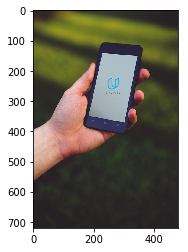

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Read in the image
image = cv2.imread('images/phone.jpg')

# Make a copy of the image
img_copy = np.copy(image)

# Change color to RGB (from BGR)
img = cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)

plt.imshow(img)

### Perform edge detection

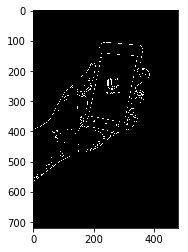

In [2]:
# Convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Define our parameters for Canny
low_threshold = 50
high_threshold = 100
edges = cv2.Canny(gray, low_threshold, high_threshold)

plt.imshow(edges, cmap='gray')

### Find lines using a Hough transform

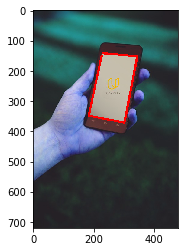

In [4]:
# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
# rho & theta define the resolution of the detection
rho = 1  # 1 pixel
theta = np.pi/180  # 1 degree
# Min. threshold to detect a line
# It's the min. number of Hough space intersections it takes to find a line
threshold = 60
min_line_length = 100
# The gap between discontinous line segments
max_line_gap = 5

line_image = np.copy(image) #creating an image copy to draw lines on

# Run Hough on the edge-detected image
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                        min_line_length, max_line_gap)


# Iterate over the output "lines" and draw lines on the image copy
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)
        
plt.imshow(line_image)